In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 
             'GEIAALKQEIAALKKENAALKWEIAALKQGYY']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 4),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 6.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[4, 32, 6.0, 200, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	66   	-376.738	864.323	-1693.04	1683.57
1  	79   	-1087.86	250.7  	-1693.04	-619.526
2  	68   	-1265.17	197.391	-1705.49	-975.278
3  	79   	-1458.53	166.851	-1765.04	-1211.27
4  	67   	-1586.24	121.572	-1765.04	-1355.54
5  	70   	-1659.32	76.9069	-1771.15	-1476.83
6  	66   	-1715.23	32.8332	-1791.62	-1638.33
7  	68   	-1733.48	28.4212	-1802.74	-1684.25
8  	76   	-1755.73	24.0972	-1802.74	-1713.33
9  	81   	-1776.71	16.1041	-1802.74	-1742.24
10 	66   	-1788.49	7.36066	-1802.74	-1772.14
11 	69   	-1793.91	3.74283	-1802.74	-1786.97
12 	82   	-1796.2 	2.97915	-1802.74	-1790.37
13 	71   	-1797.89	2.04414	-1802.89	-1794.39
14 	76   	-1798.55	1.92388	-1802.89	-1794.78
15 	73   	-1799.32	1.56572	-1802.89	-1795.82
16 	70   	-1799.72	1.58909	-1803   	-1796.69
17 	68   	-1800.16	1.48364	-1803.02	-1797.2 
18 	81   	-1800.67	1.5278 	-1804.52	-1797.52
19 	82   	-1801.17	1.57047	-1804.71	-1798.12
20 	62   	-1801.8 	1.37553	-1805.08	-1799.1 
21 	64   	-1

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1805.2220691896093

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

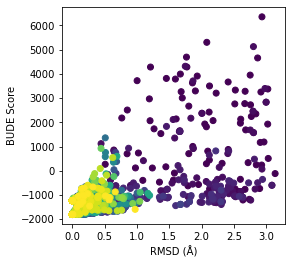

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Di_tetramer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg   	std    	min     	max    
0  	100  	298.06	1149.81	-1419.93	3499.92
1  	100  	-372.831	719.825	-1419.93	2061.88
2  	100  	-735.129	408.664	-1539.55	560.494
3  	100  	-934.425	279.581	-1767.3 	-267.317
4  	100  	-1065.09	251.529	-1767.3 	-326.897
5  	100  	-1174.17	202.826	-1767.3 	-718.799
6  	100  	-1241.73	196.373	-1792.3 	-718.799
7  	100  	-1316.67	204.101	-1792.3 	-718.799
8  	100  	-1390.14	201.386	-1792.3 	-718.799
9  	100  	-1486.57	201.237	-1819.72	-718.799
10 	100  	-1560.78	206.96 	-1825.3 	-718.799
11 	100  	-1644.83	159.28 	-1825.3 	-1119.99
12 	100  	-1714.58	113.87 	-1825.3 	-1187.57
13 	100  	-1756.11	69.258 	-1829.8 	-1486.41
14 	100  	-1787.49	41.2127	-1831.17	-1663.42
15 	100  	-1807.47	23.4653	-1833.11	-1692.75
16 	100  	-1817.41	11.3531	-1843.41	-1761.85
17 	100  	-1821.84	7.45304	-1843.41	-1801.26
18 	100  	-1825.5 	5.99496	-1843.41	-1806.84
19 	100  	-1829.08	4.55365	-1846.93	-1816.99
20 	100  	-1831.28	4.34459	-1847.01	-1821.98
21 	100  	-1832.87

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1853.5666587952228

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

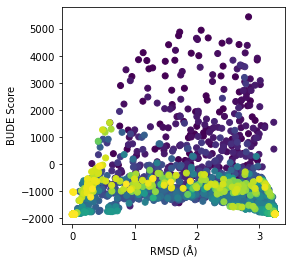

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Di_tetramer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max   
0  	100  	160.466	1301.98	-1740.34	3959.9
1  	87   	-640.55	1160.5 	-1967.59	3739  
2  	34   	-988.498	791.758	-1967.59	1840.52
3  	47   	-729.578	1057.71	-1967.59	3316.48
4  	79   	-442.564	1170.54	-1834.33	3793.57
5  	80   	-558.687	1014.76	-1834.33	4401.92
6  	51   	-682.766	957.823	-1834.33	3492.54
7  	52   	-575.026	1168.01	-1834.33	4228.86
8  	70   	-501.316	1056.14	-1796.79	3245.93
9  	70   	-416.824	1273.01	-2011.5 	3561.63
10 	45   	-756.914	911.614	-2011.5 	3144.99
11 	43   	-770.343	905.724	-2011.5 	3434.98
12 	40   	-725.253	904.388	-2011.5 	2744.51
13 	46   	-797.763	809.872	-1896.5 	3517.85
14 	74   	-207.477	1050.41	-1896.5 	2851.03
15 	81   	-151.521	1018   	-1785.88	3084.88
16 	67   	-544.42 	898.106	-1957.3 	3009.54
17 	52   	-698.313	1061.88	-1957.3 	3600.48
18 	32   	-663.683	1065.17	-1957.3 	3531.48
19 	44   	-479.013	1206.65	-1957.3 	3985.14
20 	50   	-454.394	1235.17	-1957.3 	3925.24
21 	56   	-629.322	1107.12	-1957.3 	39

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-2011.4954300957206

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

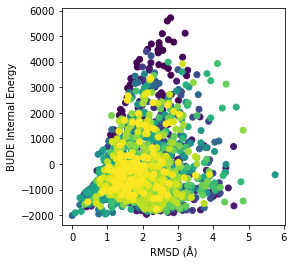

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Di_tetramer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max    
0  	100  	955.606	1231.67	-1202.02	4620.73
1  	100  	7.79703	1084.11	-1463.4 	3556.19
2  	100  	-264.351	1079.29	-1371.28	3072.37
3  	100  	-873.199	571.215	-1522.21	2196.54
4  	100  	-972.548	508.391	-1767.17	2457.32
5  	100  	-1118.23	277.015	-1803.21	-89.3186
6  	100  	-1169.71	219.326	-1664.34	-667.932
7  	100  	-1277.57	210.996	-1715.26	-721.216
8  	100  	-1358.49	198.361	-1678.4 	-884.831
9  	100  	-1428.17	162.952	-1617.8 	-969.104
10 	100  	-1509.33	117.858	-1617.32	-1240.71
11 	100  	-1595.13	50.679 	-1626.83	-1251.74
12 	100  	-1600.06	55.1713	-1628.37	-1259.26
13 	100  	-1594.1 	79.7073	-1628.61	-1259.12
14 	100  	-1618.47	5.33256	-1628.5 	-1603.99
15 	100  	-1620.64	4.87228	-1628.45	-1609.73
16 	100  	-1620.9 	5.82273	-1628.81	-1610.73
17 	100  	-1623.66	5.09828	-1628.32	-1610.62
18 	100  	-1623.56	5.97149	-1628.87	-1610.4 
19 	100  	-1623.6 	6.28094	-1629.56	-1611.26
20 	100  	-1621.88	6.86937	-1629.1 	-1611.03
21 	100  	-1622.57	

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1803.2094580821338

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

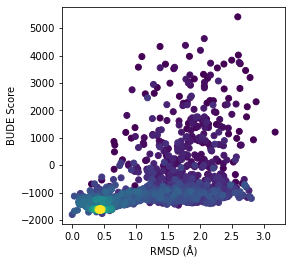

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Di_tetramer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)